This will be a helper for analyzing grocery lists. This uses excel lists made in a specific format based off of GIANT, which may obtainable from scanning receipts. The output of this file should be a standardized cvl file to be used in other programs.

First we set up the prerequisites and import the list file.

In [1]:
# Set up prerequisites
import pandas as pd
import math
store='giant'
date='07122020'
# Import the file into pandas, works for current format.
f=pd.read_excel('list0.xlsx',header=3)

## Filtering

It's important to have a 'special' category, for outlier purchases and for scalability sake. In this example, the S actually stands for splurge items. Those should be filtered out of the list. Does not need to be run if no special category present, but can be without issue.

In [2]:
s=f[f['S?']=='S']; s=s.drop('S?', axis=1);
f0=f[f['S?']!='S']; f0=f0.drop('S?', axis=1);

GIANT stores have specific entry types depending on product, which are printed in bold above all items in that category. The following code is based on that type of entry.

There are bound to be inconsistencies between different stores, but larger pool of data provides allows for merging of store-specific types, or better definition along those types. It also allows for improved entry schema, ultimate goal of receipt scanning.

In [3]:
# Generates an error but still works, look into it.
f0_prod=f0.dropna(thresh=3);
f0_type=f0[f0.count(1)<3]['Name']

f0_ti=int(f0_type.index[0]); f0_pi=int(f0_prod.index[-1])
for ii in range(f0_ti,f0_pi+1):
    if ii in f0_type:
        curr_type=f0_type.loc[ii];
    else:
        f0_prod.loc[ii,'Type']=curr_type
        # Index that corresponds to type.

C:\Users\cukel\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Products correctly associate with type.

## Cleanup

The big differentiator between this and filtering is that no rows are to be removed from this point onward. The goal is to improve readability and provide framework for other functions. At the end of cleanup data is exported as csv. First I'd like to reindex the product list and change the NaN values to blank values for readability.

In [4]:
f1=f0_prod.reset_index(drop=True)
for col in list(f1):
    for ii in range(len(f1[col])):
        f1_ii=f1.loc[ii,col]
        try:
            if math.isnan(f1_ii):
                f1.loc[ii,col]=''
        except:
            # Usually want to suppress this
            # print('Exception at ' + str(ii))
            continue

Export for use in other files.

In [5]:
f1.to_csv(str(store)+str(date)+'.csv')

## Functions

Collection of useful functions and desginations, to be branched out into full programs. Planned:
    - Improved Entry Systems
    - Better Analysis Frameworks

#### Dynamically explode largest sections of pie chart

In [6]:
def exploder(vc,scale=0.5):
    # Dynamically explode chart
    # Takes file['Sorter Variable'].value_counts() as vc
    # Add options in the future
    tot=sum(vc);exp=[];
    for ii in vc:
        exp.append((ii/tot)*scale)
    return exp

## Basic Interpretation

In [7]:
# Percentage of net value marked special, by cost.
s_net_cost=sum(s['Net Cost']); f1_net_cost=sum(f1['Net Cost'])+s_net_cost; 
print('Total Cost:',str(f1_net_cost))
print('Special Cost:',str(s_net_cost))
print("Percentage:",str(s_net_cost/(f1_net_cost+s_net_cost)))

Total Cost: 150.72595
Special Cost: 25.86
Percentage: 0.14644426694196222


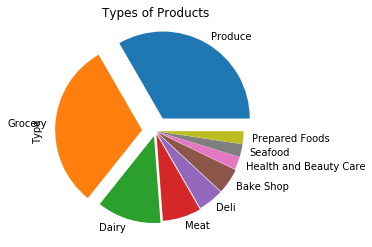

In [12]:
import matplotlib.pyplot as plt
explode=(0,0.1,0,0,0,0,0,0,0)
plot_data=f1['Type'].value_counts()
plot_data.plot(kind='pie',title='Types of Products',explode=exploder(plot_data))

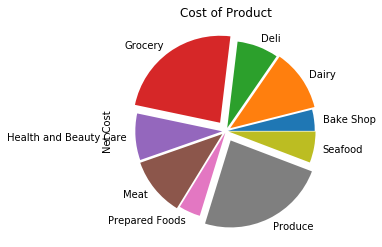

In [9]:
import matplotlib.pyplot as plt
f1_type=f1.groupby('Type').sum()
plot_data=f1_type['Net Cost']
plot_data.plot(kind='pie',title='Cost of Product',explode=exploder(plot_data))

In [10]:
print(s['Net Cost'].mean(),f1['Net Cost'].mean())

5.172 2.97299880952381


In [11]:
for ii in f1['Type'].value_counts():
    print('test')

test
test
test
test
test
test
test
test
test
